Import

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class MultiLayerBinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Sequential(
        nn.Linear(352,352),
        nn.ReLU(),
        nn.Linear(352,352),
        nn.ReLU())    
        self.layer2=nn.Sequential(
        nn.Linear(352,352),
        nn.ReLU(),
        nn.Linear(352,1),
        nn.Sigmoid())    
    
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        return x

<h2>Read processed dataframe<h2>

In [2]:
ada = ADASYN()

In [57]:
pathway=pd.read_csv("sfarifalsedeletedppipathwaykeggdf3.2.csv",index_col=0)  #read dataframe
x = pathway[pathway.columns.difference(['phenotype'])]   
y = pathway['phenotype']
X_resampled, y_resampled = ada.fit_resample(x, y)
#scaler = StandardScaler()
#x_overscaled = scaler.fit_transform(X_resampled)
x_overtrain, x_overtest, y_overtrain, y_overtest= train_test_split(X_resampled, y_resampled, 
                                                            test_size = 0.3, random_state = 123)

print(x_overtest.shape)

(3085, 353)


<h1>putting dataframe into tensor <h1>

In [57]:
x

,hsa00010,hsa00020,hsa00030,hsa00040,hsa00051,hsa00052,hsa00053,hsa00061,hsa00062,hsa00071,...,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05415,hsa05416,hsa05417,hsa05418,rowsum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.5,0.0,0.2,0.0,0.0,0.9,1.8,1.3,151.2
1,0.0,0.0,0.0,0.1,0.0,0.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,94.7
2,0.1,0.3,0.2,3.6,0.3,0.7,3.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.7,0.2,179.5
4,0.3,0.3,0.0,0.0,0.0,0.0,0.0,2.0,0.3,2.5,...,0.2,0.0,0.3,0.1,0.2,1.4,0.1,0.8,0.4,162.9
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
ada = ADASYN()
x = pathway[pathway.columns.difference(['phenotype'])]
y = pathway['phenotype']
X_resampled, y_resampled = ada.fit_resample(x, y)
scaler = StandardScaler()
x_overscaled = scaler.fit_transform(X_resampled)
x_overtrain, x_overtest, y_overtrain, y_overtest= train_test_split(x_overscaled, y_resampled, 
                                                            test_size = 0.2, random_state = 123)
y_train = torch.tensor(y_overtrain.values)
x_train = torch.tensor(x_overtrain)
x_test  = torch.tensor(x_overtest)
y_test  = torch.tensor(y_overtest.values)
y_train.unsqueeze_(dim=1)




tensor([[1.],
        [0.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], dtype=torch.float64)

<h2>Running Perceptron Classifier<h2>

In [12]:
model=MultiLayerBinaryClassifier()
optimizer=optim.SGD(model.parameters(),lr=1e-04)

In [13]:

nb_epochs=100000
device ="cuda" if torch.cuda.is_available() else "cpu"
criterion=torch.nn.BCELoss().to(device)
for epoch in range(nb_epochs+1):
    hypothesis=model(x_train.float())
    optimizer.zero_grad()
 
    cost=criterion(hypothesis,y_train.float())        
    cost.backward()
    optimizer.step()
   
    if epoch%500==0:
        hypothesis2=model(x_test.float())
        prediction = hypothesis2>= torch.FloatTensor([0.5])
        correct_prediction =prediction.float() ==y_test
        accuracy=correct_prediction.sum().item()/len(correct_prediction)
        print('Epoch{:4d} , Accurracty{:2f}'.format(epoch,accuracy))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (8024x353 and 352x352)

In [ ]:
optimizer2=optim.SGD(model2.parameters(),lr=1e-4)
nb_epochs=20000000
for epoch in range(nb_epochs+1):
    hypothesis=model2(x_train.float())
    cost=F.binary_cross_entropy(hypothesis,y_train.float())        
    optimizer2.zero_grad()
    cost.backward()
    optimizer2.step()
    prediction =hypothesis>= torch.FloatTensor([0.5])
    correct_prediction =prediction.float() ==y_train
    accuracy=correct_prediction.sum().item()/len(correct_prediction)
    if epoch%10000==0:
        print('Epoch{:4d} , cost{:2f} ,Accurracy{:2f}'.format(epoch,cost,accuracy))

<h2>Running uncustomized xgboost classifier<h2>

In [17]:
pathway=pd.read_csv("../data/ppipathway1.3.csv",index_col=0)
ada = ADASYN()
x = pathway[pathway.columns.difference(['phenotype'])]
y = pathway['phenotype']
X_resampled, y_resampled = ada.fit_resample(x, y)
scaler = StandardScaler()
x_overscaled = scaler.fit_transform(X_resampled)
x_overtrain, x_overtest, y_overtrain, y_overtest= train_test_split(x_overscaled, y_resampled, 
                                                    test_size = 0.2, random_state = 123)
train_acc_before, test_acc_before = xgboost_uncustomized( 
                                                      x_overtrain_re,
                                                      y_overtrain_re,
                                                      x_overtest_re,
                                                      y_overtest_re)

print(train_acc_before,test_acc_before)    
        



NameError: name 'xgboost_uncustomized' is not defined

In [17]:
train_acc_before, test_acc_before = xgboost_uncustomized( 
                                                      x_overtrain_re,
                                                      y_overtrain_re,
                                                      x_overtest_re,
                                                      y_overtest_re)

print(train_acc_before,test_acc_before) 

NameError: name 'x_overtrain_re' is not defined

In [14]:
train_acc_before, test_acc_before = xgboost_uncustomized( 
                                                      x_overtrain,
                                                      y_overtrain,
                                                      x_overtest,
                                                      y_overtest)
print(train_acc_before,test_acc_before) 

0.9778 0.873


In [13]:
train_acc_before, test_acc_before = modeling_uncustomized( 
                                                      x_overtrain,
                                                      y_overtrain,
                                                      x_overtest,
                                                      y_overtest)

TypeError: modeling_uncustomized() missing 1 required positional argument: 'y_test'

In [19]:
print(train_acc_before,test_acc_before)

0.9833 0.8711


<h1>Xgboost grid search #find best parameter toward gridsearch<h1>

In [28]:
params={
    'min_child_weight':[1,5,10],
    'max_depth':[3,5,8,10],
    'gamma':[0,0.1,1]
}

uncustomized = xgb.XGBClassifier(booster='gbtree')
grid_cv=GridSearchCV(uncustomized,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(x_overtrain, y_overtrain)

print(f"최적의파라미터 :{grid_cv.best_params_}")
print(f"최고성늘 :{grid_cv.best_score_}")

AttributeError: 'GridSearchCV' object has no attribute 'best_parmas_'

In [40]:
print(f"최적의파라미터 :{grid_cv.best_params_}")
print(f"최고성늘 :{grid_cv.best_score_}")
uncustomized = xgb.XGBClassifier(booster='gbtree')
uncustomized.fit(x_overtest,y_overtest)
x_overtrain, x_overtest, y_overtrain, y_overtest = train_test_split(x_overscaled, y_resampled, 
                                                    test_size = 0.3)
train_score=uncustomized.score(x_overtrain,y_overtrain)
test_score=uncustomized.score(x_overtest,y_overtest)
print(train_score)
print(test_score)

최적의파라미터 :{'gamma': 0.1, 'max_depth': 10, 'min_child_weight': 1}
최고성늘 :0.7752877572375305
0.7814430934821607
0.7749360613810742


<h1>Run uncustomized rfc<h1>

In [36]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_overtrain,
                                                          y_overtrain,
                                                          x_overtest,
                                                          y_overtest)

In [39]:
print(train_acc_before, test_acc_before)

0.9825 0.8946


In [26]:
print(newx.shape)
print(newy.shape)

(11306, 29)
(2827, 29)


In [10]:
print(train_acc_before,test_acc_before)

0.8364 0.7541


In [27]:
def run(filename):   #function to do autorun 
    pathway=pd.read_csv(filename,index_col=0)
    ada = ADASYN()
    x = pathway[pathway.columns.difference(['phenotype'])]
    y = pathway['phenotype']
    X_resampled, y_resampled = ada.fit_resample(x, y)
    scaler = StandardScaler()
    x_overscaled = scaler.fit_transform(X_resampled)
    x_overtrain, x_overtest, y_overtrain, y_overtest = train_test_split(x_overscaled, y_resampled, 
                                                    test_size = 0.2, random_state = 123)
    train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_overtrain,
                                                          y_overtrain,
                                                          x_overtest,
                                                          y_overtest)
    return train_acc_before, test_acc_before
    
    

In [ ]:
from imblearn.over_sampling import ADASYN   # run prediction 30times for each k and get average and sort it
average=[]
for k in range(1,20):
    temp=[]
    for j in range(20):
        address="ppipathway"+str(round(k/10,1))+".csv"
        x,y=run(address)
        temp.append(y)
    average.append([sum(temp)/len(temp),k])
average.sort()
print(average)
        
        

In [67]:
pathway=pd.read_csv("ppipathway1.3.csv",index_col=0)  #accuracy is highest when k is 1.3
pathway=pathway[top100]

In [68]:

condition = pathway['phenotype'] == 1
condition2 = pathway['phenotype'] == 0
true_index = condition[condition == True].index
true_index2 = condition2[condition2 == True].index
ada = ADASYN()
X_resampled,Y_resample=ada.fit_resample(pathway,pathway['phenotype'])



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, 
                                                    test_size = 0.3, random_state = 123)

In [ ]:
y_train.value_counts(normalize=True) #check if the train,test split was successful

In [ ]:
y_test.value_counts(normalize=True)

<h1>Functions <h1>

In [9]:
import xgboost as xgb

def xgboost_uncustomized ( x_train, y_train, x_test, y_test):  #xgboost classifier
    uncustomized = xgb.XGBClassifier(booster='gbtree')
    uncustomized.fit(x_train, y_train)
    train_score= uncustomized.score(x_train, y_train).round(4)
    test_score= uncustomized.score(x_test, y_test).round(4)
    return train_score, test_score

In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
# 랜덤포레스트 분류 알고리즘
algorithm = RFC
algorithm_name = 'rfc'

In [40]:
from sklearn.metrics import roc_auc_score 
def modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test):
    uncustomized = algorithm(random_state=613)
    uncustomized.fit(x_train, y_train)
    train_score= uncustomized.score(x_train, y_train).round(4)
    test_score= uncustomized.score(x_test, y_test).round(4)
    
    return train_score, test_score

In [41]:
def optim_n_estimator(algorithm, algorithm_name,x_train,y_train,x_test,y_test,n_estimator_min,n_estimator_max):
    train_score = []
    test_score =[]
    forest_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]
    for estimators in forest_n_tree:
        model = algorithm(n_estimators = estimators, random_state=613)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))
    df_score = pd.DataFrame({'n_estimators': forest_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    print(round(df_score, 4))

In [42]:
def optim_max_depth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []
    test_score = []
    forest_depth = [depth for depth in range(depth_min, depth_max)]
    for v_max_depth in forest_depth:
        model = algorithm(max_depth = v_max_depth,n_estimators = n_estimator,random_state=613)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))
    df_score= pd.DataFrame({'depth': forest_depth, 'TrainScore': train_score, 'TestScore': test_score})
    print(round(df_score, 4))

In [43]:
def optim_min_split (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []
    test_score = []
    forest_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in forest_split:
        model = algorithm(min_samples_split = v_min_samples_split,
                          n_estimators = n_estimator,
                          max_depth = n_depth,
                          random_state = 1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))
    df_score= pd.DataFrame({'min_samples_split': forest_split, 'TrainScore': train_score, 'TestScore': test_score})
    print(round(df_score, 4))

In [44]:
def optim_min_leaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []
    test_score = []
    forest_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]
    for v_min_samples_leaf in forest_leaf:
        model = algorithm(min_samples_leaf = v_min_samples_leaf,
                            n_estimators = n_estimator,
                            max_depth = n_depth,
                            min_samples_split = n_split,
                            random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))
    df_score= pd.DataFrame({'min_samples_leaf': forest_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    print(round(df_score, 4))

In [45]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    
    model = algorithm(random_state = 1234, 
                      n_estimators = n_estimator, 
                      min_samples_leaf = n_leaf,
                      min_samples_split = n_split, 
                      max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    # 모델 저장
    model_path = 'model/'
    model_filename = 'ASD__diagnosis' + algorithm_name + '.pkl'
    #with open(model_path + model_filename, 'wb') as f:
    #    pickle.dump(model, f)
    #print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
    # 변수 중요도 산출
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출
    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 시각화
    coordinates = range(20) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"][:20])
    plt.yticks(coordinates, dt_importance["Feature"][:20]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름
    #plt.savefig('figure/' + algorithm_name + '_feature_importance.png') # 변수 중요도 그래프 저장

In [46]:
n_estimator_min = 1
n_estimator_max = 31
optim_n_estimator(algorithm, algorithm_name, 
                 x_overtrain, y_overtrain, x_overtest, y_overtest, 
                 n_estimator_min, n_estimator_max)

    n_estimators  TrainScore  TestScore
0              5      0.9677     0.8198
1             10      0.9782     0.8443
2             15      0.9812     0.8606
3             20      0.9817     0.8615
4             25      0.9824     0.8695
5             30      0.9824     0.8733
6             35      0.9823     0.8752
7             40      0.9825     0.8781
8             45      0.9824     0.8841
9             50      0.9825     0.8844
10            55      0.9824     0.8851
11            60      0.9825     0.8854
12            65      0.9825     0.8879
13            70      0.9825     0.8883
14            75      0.9825     0.8879
15            80      0.9825     0.8930
16            85      0.9825     0.8902
17            90      0.9825     0.8930
18            95      0.9825     0.8927
19           100      0.9825     0.8946
20           105      0.9825     0.8962
21           110      0.9825     0.8940
22           115      0.9825     0.8962
23           120      0.9825     0.8965


In [48]:
n_estimator=135

In [49]:
depth_min = 1
depth_max = 21
optim_max_depth(algorithm, algorithm_name, 
                x_overtrain, y_overtrain, x_overtest, y_overtest, 
                depth_min, depth_max, n_estimator)

    depth  TrainScore  TestScore
0       1      0.6707     0.6746
1       2      0.6771     0.6813
2       3      0.6927     0.6944
3       4      0.7040     0.7007
4       5      0.7451     0.7268
5       6      0.8054     0.7580
6       7      0.8700     0.7797
7       8      0.9127     0.8122
8       9      0.9416     0.8278
9      10      0.9585     0.8472
10     11      0.9659     0.8555
11     12      0.9711     0.8679
12     13      0.9738     0.8771
13     14      0.9758     0.8758
14     15      0.9767     0.8765
15     16      0.9772     0.8790
16     17      0.9783     0.8781
17     18      0.9787     0.8835
18     19      0.9790     0.8851
19     20      0.9794     0.8825


In [50]:
n_depth=None
n_estimator=135

In [51]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optim_min_split (algorithm, algorithm_name,
                 x_overtrain, y_overtrain, x_overtest, y_overtest,
                 n_split_min, n_split_max, n_estimator, n_depth)

    min_samples_split  TrainScore  TestScore
0                   2      0.9825     0.8905
1                   4      0.9806     0.8905
2                   6      0.9790     0.8844
3                   8      0.9787     0.8822
4                  10      0.9786     0.8822
5                  12      0.9784     0.8822
6                  14      0.9771     0.8809
7                  16      0.9779     0.8752
8                  18      0.9760     0.8790
9                  20      0.9754     0.8793
10                 22      0.9749     0.8787
11                 24      0.9733     0.8711
12                 26      0.9728     0.8752
13                 28      0.9716     0.8733
14                 30      0.9711     0.8739
15                 32      0.9707     0.8717
16                 34      0.9694     0.8723
17                 36      0.9679     0.8752
18                 38      0.9667     0.8733
19                 40      0.9677     0.8688
20                 42      0.9666     0.8669
21        

In [52]:
n_split=2
n_depth=None
n_estimator=135

In [53]:
n_leaf_min = 1
n_leaf_max = 51
optim_min_leaf(algorithm, algorithm_name, 
               x_overtrain, y_overtrain, x_overtest, y_overtest, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9769     0.8825
1                  4      0.9716     0.8758
2                  6      0.9678     0.8749
3                  8      0.9629     0.8717
4                 10      0.9591     0.8663
5                 12      0.9548     0.8644
6                 14      0.9506     0.8548
7                 16      0.9486     0.8485
8                 18      0.9436     0.8424
9                 20      0.9385     0.8427
10                22      0.9360     0.8383
11                24      0.9329     0.8402
12                26      0.9296     0.8319
13                28      0.9217     0.8271
14                30      0.9206     0.8294
15                32      0.9180     0.8220
16                34      0.9106     0.8300
17                36      0.9053     0.8160
18                38      0.9009     0.8131
19                40      0.8977     0.8099
20                42      0.8945     0.8087
21                44      0.8912

In [54]:
n_leaf=1
n_split=2
n_depth=None
n_estimator=135

In [55]:
feature_name=x.columns

Accuracy: 0.895
Precision: 0.897
Recall: 0.888
F1-score: 0.892
      Feature  Importance
352  hsa05418       0.014
314  hsa05205       0.014
310  hsa05200       0.014
275  hsa05022       0.013
85   hsa01100       0.013
..        ...         ...
23   hsa00290       0.000
35   hsa00470       0.000
72   hsa00780       0.000
73   hsa00785       0.000
224  hsa04814       0.000

[353 rows x 2 columns]


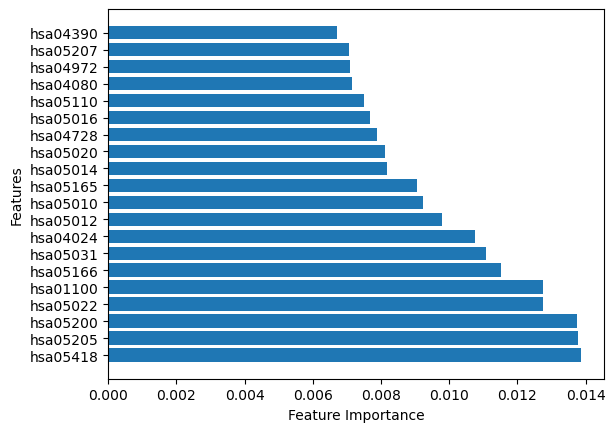

In [58]:
dt_importance=pd.DataFrame()
model_final(algorithm, algorithm_name, feature_name,
            x_overtrain, y_overtrain, x_overtest, y_overtest,
            n_estimator, n_depth, n_split, n_leaf)

In [55]:
x.columns

Index(['hsa00010', 'hsa00020', 'hsa00030', 'hsa00040', 'hsa00051', 'hsa00052',
       'hsa00053', 'hsa00061', 'hsa00062', 'hsa00071',
       ...
       'hsa05332', 'hsa05340', 'hsa05410', 'hsa05412', 'hsa05414', 'hsa05415',
       'hsa05416', 'hsa05417', 'hsa05418', 'rowsum'],
      dtype='object', length=354)

In [15]:
ada = ADASYN()
x = pathway[pathway.columns.difference(['phenotype'])]
y = pathway['phenotype']
X_resampled, y_resampled = ada.fit_resample(x, y)
scaler = StandardScaler()
x_overscaled = scaler.fit_transform(X_resampled)
x_overtrain, x_overtest, y_overtrain, y_overtest = train_test_split(x_overscaled, y_resampled, 
                                                    test_size = 0.2, random_state = 123)

Accuracy: 0.889
Precision: 0.892
Recall: 0.873
F1-score: 0.882
      Feature  Importance
310  hsa05200       0.014
275  hsa05022       0.014
314  hsa05205       0.013
274  hsa05020       0.012
85   hsa01100       0.012
..        ...         ...
23   hsa00290       0.000
72   hsa00780       0.000
35   hsa00470       0.000
73   hsa00785       0.000
224  hsa04814       0.000

[353 rows x 2 columns]


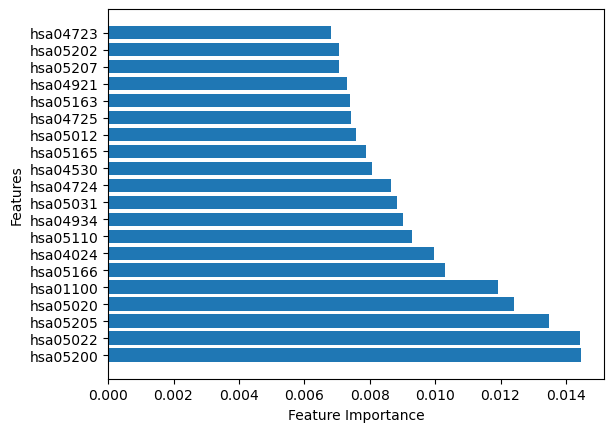

In [38]:
dt_importance=pd.DataFrame()
model_final(algorithm, algorithm_name, feature_name,
            x_overtrain, y_overtrain, x_overtest, y_overtest,
            n_estimator, n_depth, n_split, n_leaf)

In [15]:
newx_train=x_overtrain+x_overtrain_re
newx_test=x_overtest+x_overtest_re

NameError: name 'x_overtrain_re' is not defined

In [16]:
x_overtrain+x_overtrain

array([[-0.19810921, -0.12503066, -0.14884875, ..., -0.28498   ,
        -0.43293267, -0.34546524],
       [-0.19810921, -0.12503066, -0.14884875, ..., -0.28498   ,
        -0.43293267, -0.34546524],
       [-0.19810921, -0.12503066, -0.14884875, ..., -0.28498   ,
        -0.43293267, -0.34546524],
       ...,
       [-0.19810921, -0.12503066, -0.14884875, ..., -0.28498   ,
        -0.43293267, -0.34546524],
       [-0.19810921, -0.12503066, -0.14884875, ..., -0.28498   ,
        -0.43293267, -0.34546524],
       [-0.19810921, -0.12503066, -0.14884875, ..., -0.28498   ,
        -0.43293267, -0.34546524]])

In [29]:
x_overtrain.shape

(11306, 29)

In [57]:
importance=dt_importance['Feature']

In [31]:
y_overtrain.value_counts()

0.0    5252
1.0    4902
Name: phenotype, dtype: int64

Accuracy: 0.827
Precision: 0.799
Recall: 0.863
F1-score: 0.830
          Feature  Importance
3   R-HSA-1430728       0.054
9   R-HSA-1643685       0.054
12   R-HSA-382551       0.052
1    R-HSA-112316       0.051
27  R-HSA-9709957       0.050
7    R-HSA-162582       0.049
2   R-HSA-1266738       0.047
21    R-HSA-74160       0.037
28  R-HSA-9748784       0.036
25  R-HSA-9609507       0.036
10   R-HSA-168256       0.035
18  R-HSA-5653656       0.034
0    R-HSA-109582       0.034
13   R-HSA-392499       0.034
4   R-HSA-1474165       0.032
14   R-HSA-397014       0.032
16  R-HSA-4839726       0.031
23  R-HSA-8953897       0.030
11  R-HSA-1852241       0.030
8   R-HSA-1640170       0.030
5   R-HSA-1474244       0.029
22  R-HSA-8953854       0.029
6   R-HSA-1500931       0.029
17  R-HSA-5357801       0.027
15   R-HSA-400253       0.023
20    R-HSA-73894       0.022
26  R-HSA-9612973       0.022
19    R-HSA-69306       0.018
24  R-HSA-8963743       0.011


FileNotFoundError: [Errno 2] No such file or directory: 'figure/rfc_feature_importance.png'

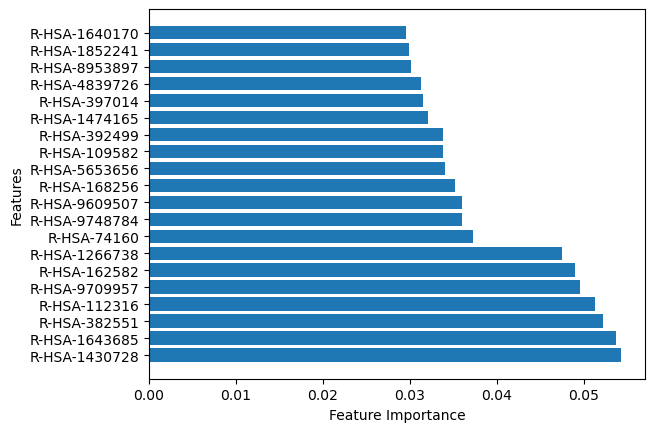

In [35]:
dt_importance=pd.DataFrame()
model_final(algorithm, algorithm_name, feature_name,
            x_overtrain_re, y_overtrain_re, x_overtest_re, y_overtest_re,
            n_estimator, n_depth, n_split, n_leaf)

<h1>Run Other Classifier<h1>
    <h2>1.LogisticRegression<h2>

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_overtrain, y_overtrain)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

prediction = lr.predict(x_overtest)
print((prediction == y_overtest).mean())

0.707876370887338


/Users/cjh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_overtrain_re, y_overtrain_re)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

prediction = lr.predict(x_overtest_re)
print((prediction == y_overtest_re).mean())

NameError: name 'x_overtrain_re' is not defined

<h2>2. SGD classifier<h2>

In [16]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=0)
sgd.fit(x_overtrain_re, y_overtrain_re)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
prediction = sgd.predict(x_overtest_re)
print((prediction == y_overtest_re).mean())


NameError: name 'x_overtrain_re' is not defined

In [35]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=0)
sgd.fit(x_overtrain, y_overtrain)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
prediction = sgd.predict(x_overtest)
print((prediction == y_overtest).mean())


0.6366806136680614


<h2>3.K-N Classifier<h2>

In [294]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_overtrain, y_overtrain)  
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

prediction = knn.predict(x_overtest)
print((prediction == y_overtest).mean())
knn2 = KNeighborsClassifier(n_neighbors=9)
knn2.fit(x_overtrain2, y_overtrain2)  
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

prediction = knn2.predict(x_overtest2)
print((prediction == y_overtest2).mean())

0.659846547314578
0.6567840948726892


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_overtrain_re, y_overtrain_re)  
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

prediction = knn.predict(x_overtest_re)
print((prediction == y_overtest_re).mean())

0.6947293951185002


/Users/cjh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [1]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_overtrain_re, y_overtrain_re)  
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

prediction = knn.predict(x_overtest)
print((prediction == y_overtest).mean())
knn2 = KNeighborsClassifier(n_neighbors=9)
knn2.fit(x_overtrain2, y_overtrain2)  
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

prediction = knn2.predict(x_overtest2)
print((prediction == y_overtest2).mean())

NameError: name 'x_overtrain_re' is not defined

<h2>4. Support Vector Classifier<h2>

In [293]:
from sklearn.svm import SVC 
svc = SVC(random_state=0)
svc.fit(x_overtrain2, y_overtrain2)
svc_pred = svc.predict(x_overtest2)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


print((svc_pred == y_overtest2).mean())

0.6309731426578304


In [34]:
from sklearn.svm import SVC 
svc = SVC(random_state=0)
svc.fit(x_overtrain_re, y_overtrain_re)
svc_pred = svc.predict(x_overtest_re)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


print((svc_pred == y_overtest_re).mean())

0.6388397594623275


In [6]:
pathway=pd.read_csv("ppipathwaydf4.csv",index_col=0)
ada = ADASYN()
x_re= pathway[pathway.columns.difference(['phenotype'])]
y_re= pathway['phenotype']

X_resampled, y_resampled = ada.fit_resample(x_re, y_re)
scaler = StandardScaler()
indices =X_resampled.index

x_overtrain_re, x_overtest_re, y_overtrain_re, y_overtest_re,indices_train,indices_test= train_test_split(x_overscaled, y_resampled,indices, 
                                                       test_size = 0.2, random_state = 123)
print(x_re.shape)     
print(x_overtest_re.shape)

NameError: name 'x_overscaled' is not defined

In [140]:
indices

RangeIndex(start=0, stop=14133, step=1)

In [129]:

x_resampled, y_resampled = ada.fit_resample(x, y)

x_overtrain, x_overtest, y_overtrain_re, y_overtest_re= train_test_split(x_overscaled, y_resampled, 
                                                       test_size = 0.2, random_state = 123)
print(x_re.shape)     
print(x_overtest_re.shape)

(8743, 353)


In [14]:
X_resampled, y_resampled = ada.fit_resample(newx, y_re)
scaler = StandardScaler()
x_overscaled= scaler.fit_transform(X_resampled)
x_overscaled_df = pd.DataFrame(x_overscaled, index=X_resampled.index, columns=X_resampled.columns)





NameError: name 'newx' is not defined

In [179]:
x_overscaled_df

,hsa00010,hsa00020,hsa00030,hsa00040,hsa00051,hsa00052,hsa00053,hsa00061,hsa00062,hsa00071,...,R-HSA-69306,R-HSA-73894,R-HSA-74160,R-HSA-8953854,R-HSA-8953897,R-HSA-8963743,R-HSA-9609507,R-HSA-9612973,R-HSA-9709957,R-HSA-9748784
0,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.366402,-0.401759,-0.412583,-0.461239,-0.242874,-0.325016,-0.321982,-0.413624,-0.382337
1,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.323728,-0.382994,-0.314244,-0.197347,-0.305167,-0.242874,-0.302044,-0.389500,-0.316168,-0.301382
2,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.323728,-0.344280,-0.286140,0.566912,-0.318105,-0.242874,-0.370960,-0.202831,-0.107968,1.621291
3,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.365612,-0.378280,-0.412583,-0.449109,-0.046289,-0.370960,-0.441132,-0.426913,-0.382337
4,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.379834,-0.416345,-0.401653,-0.418380,5.654700,-0.313530,-0.250491,-0.249721,-0.200189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13809,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.380221,-0.461628,-0.412583,-0.457921,-0.242874,-0.370960,-0.441132,-0.425285,-0.372419
13810,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.382625,-0.463873,-0.412583,-0.473097,-0.242874,-0.370960,-0.441132,-0.415176,-0.346587
13811,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.375970,-0.466458,-0.412583,-0.471554,-0.242874,-0.370960,-0.441132,-0.400659,-0.382337
13812,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.379670,-0.464422,-0.412583,-0.463139,-0.242874,-0.370960,-0.441132,-0.414488,-0.382337


In [13]:
x_overtrain_mixed, x_overtest_mixed, y_overtrain_mixed, y_overtest_re= train_test_split(x_overscaled_df, y_resampled, 
                                                            test_size = 0.2, random_state = 123)

NameError: name 'x_overscaled_df' is not defined

In [189]:
x_train_mixed, x_test_mixed, y_train_mixed, y_test_mixed= train_test_split(X_resampled, y_resampled, 
                                                            test_size = 0.2, random_state = 123)

In [191]:
x_overtrain_mixed

,hsa00010,hsa00020,hsa00030,hsa00040,hsa00051,hsa00052,hsa00053,hsa00061,hsa00062,hsa00071,...,R-HSA-69306,R-HSA-73894,R-HSA-74160,R-HSA-8953854,R-HSA-8953897,R-HSA-8963743,R-HSA-9609507,R-HSA-9612973,R-HSA-9709957,R-HSA-9748784
5933,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.382994,-0.474333,-0.412583,-0.474986,-0.242874,-0.370960,-0.441132,-0.426913,-0.382337
13119,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.382994,-0.473851,-0.411446,-0.472626,-0.242874,-0.370960,-0.441132,-0.426913,-0.352809
8963,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.382994,-0.430779,-0.410422,-0.435823,0.052004,-0.301211,-0.441132,-0.067136,-0.324502
6100,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.332854,-0.366402,-0.463304,-0.404176,-0.461239,2.705913,-0.370960,-0.441132,-0.426913,-0.341859
2012,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.382994,-0.420258,-0.407539,-0.455578,0.052004,-0.370960,-0.441132,-0.360466,-0.382337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,0.926534,0.964893,2.412595,2.713393,1.817574,0.346883,3.212663,1.596345,2.448020,0.548642
12252,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.320670,-0.372020,-0.293803,-0.398808,-0.325047,3.616527,-0.191726,-0.218495,-0.317627,-0.250228
1346,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.341910,-0.406028,-0.412583,-0.392502,0.052004,-0.370960,-0.441132,-0.342747,-0.281143
11646,-0.106787,-0.064795,-0.078296,-0.083867,-0.091189,-0.084415,-0.07386,-0.07779,-0.060684,-0.094981,...,-0.353388,-0.382994,-0.474333,-0.412583,-0.474986,-0.242874,-0.370960,-0.441132,-0.426913,-0.382337


In [104]:
newx=pd.concat([x,x_re],axis=1)
newx.head(10)


,hsa00010,hsa00020,hsa00030,hsa00040,hsa00051,hsa00052,hsa00053,hsa00061,hsa00062,hsa00071,...,R-HSA-69306,R-HSA-73894,R-HSA-74160,R-HSA-8953854,R-HSA-8953897,R-HSA-8963743,R-HSA-9609507,R-HSA-9612973,R-HSA-9709957,R-HSA-9748784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.1,20.4,0.0,1.7,0.0,0.4,3.0,0.3,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3,0.0,45.0,25.6,21.0,0.0,0.6,1.3,2.5,0.4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3,4.9,52.9,116.5,19.4,0.0,0.0,6.0,7.2,9.9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.2,27.0,0.0,3.2,0.2,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,16.3,1.3,7.0,6.0,0.5,4.8,4.0,0.9
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,13.8,141.9,5.9,47.2,0.6,1.0,9.1,2.7,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,17.4,0.2,1.2,0.0,0.0,0.5,0.8,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103.7,79.8,298.3,58.7,170.2,0.0,4.4,19.6,6.0,0.8
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,93.9,106.7,113.3,10.3,47.1,0.3,0.5,18.8,5.6,4.0


In [12]:
x_overtrain_kegg=x_overtrain_mixed[x.columns]
x_overtest_kegg=x_overtest_mixed[x.columns]
x_overtrain_re=x_overtrain_mixed[x_re.columns]
x_overtest_re=x_overtest_mixed[x_re.columns]
x_train_kegg=x_train_mixed[x.columns]
x_test_kegg=x_test_mixed[x.columns]
x_train_re=x_train_mixed[x_re.columns]
x_test_re=x_test_mixed[x_re.columns]

NameError: name 'x_overtrain_mixed' is not defined

In [185]:
x_test_kegg


,hsa00010,hsa00020,hsa00030,hsa00040,hsa00051,hsa00052,hsa00053,hsa00061,hsa00062,hsa00071,...,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05415,hsa05416,hsa05417,hsa05418
11925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
12921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
11246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.255555,0.0,0.255555,0.0
3735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
5467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,3.000000,1.0,2.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
9880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
12331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [187]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_train_kegg,
                                                          y_train_mixed,
                                                          x_test_kegg,
                                                          y_test_mixed)
print(train_acc_before,test_acc_before)
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_over_train_kegg,
                                                          y_overtrain_mixed,
                                                          x_over_test_kegg,
                                                          y_overtest_mixed)
print(train_acc_before,test_acc_before)
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_over_train_re,
                                                          y_overtrain_mixed,
                                                          x_over_test_re,
                                                          y_overtest_mixed)
print(train_acc_before,test_acc_before)
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_train_re,
                                                          y_train_mixed,
                                                          x_test_re,
                                                          y_test_mixed)
print(train_acc_before,test_acc_before)

0.8335 0.7506
0.8336 0.646
0.9121 0.6536
0.9119 0.8147


In [23]:
test_acc_before

0.8182

In [15]:
x_re2=x_re.sum(axis=1)

In [119]:
x_overtest

array([[-0.09902562, -0.06376069, -0.07401737, ..., -0.14144798,
        -0.21614043, -0.17064972],
       [-0.09902562, -0.06376069, -0.07401737, ..., -0.14144798,
        -0.21614043, -0.17064972],
       [-0.09902562, -0.06376069, -0.07401737, ..., -0.14144798,
        -0.21614043, -0.17064972],
       ...,
       [-0.09902562, -0.06376069, -0.07401737, ..., -0.14144798,
        -0.21614043, -0.17064972],
       [-0.09902562, -0.06376069, -0.07401737, ..., -0.14144798,
        -0.21614043, -0.17064972],
       [-0.09902562, -0.06376069, -0.07401737, ..., -0.14144798,
        -0.21614043, -0.17064972]])

In [13]:
test_acc_before

0.8171

In [121]:
x

,hsa00010,hsa00020,hsa00030,hsa00040,hsa00051,hsa00052,hsa00053,hsa00061,hsa00062,hsa00071,...,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05415,hsa05416,hsa05417,hsa05418
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0
33228,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
x_re2.loc[33229]

NameError: name 'x_re2' is not defined

In [ ]:
indexs=[]
for i in x_re2.index:
    if x_re2.loc[i]!=0.0 :
        indexs.append(i)

In [54]:
x_re

,R-HSA-109582,R-HSA-112316,R-HSA-1266738,R-HSA-1430728,R-HSA-1474165,R-HSA-1474244,R-HSA-1500931,R-HSA-162582,R-HSA-1640170,R-HSA-1643685,...,R-HSA-69306,R-HSA-73894,R-HSA-74160,R-HSA-8953854,R-HSA-8953897,R-HSA-8963743,R-HSA-9609507,R-HSA-9612973,R-HSA-9709957,R-HSA-9748784
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
x_re=x_re.loc[indexs]

In [64]:
x_re

,R-HSA-109582,R-HSA-112316,R-HSA-1266738,R-HSA-1430728,R-HSA-1474165,R-HSA-1474244,R-HSA-1500931,R-HSA-162582,R-HSA-1640170,R-HSA-1643685,...,R-HSA-69306,R-HSA-73894,R-HSA-74160,R-HSA-8953854,R-HSA-8953897,R-HSA-8963743,R-HSA-9609507,R-HSA-9612973,R-HSA-9709957,R-HSA-9748784
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
33209,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
y_re2=y_re2.loc[indexs]

In [5]:
y_re.value_counts()

1.0    6982
0.0    1761
Name: phenotype, dtype: int64

In [18]:
X_resampled, y_resampled = ada.fit_resample(x_re, y_re)
scaler = StandardScaler()
x_overscaled = scaler.fit_transform(X_resampled)

x_overtrain_re, x_overtest_re, y_overtrain_re, y_overtest_re= train_test_split(x_overscaled, y_resampled, 
                                                            test_size = 0.2, random_state = 123)
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_overtrain_re,
                                                          y_overtrain_re,
                                                          x_overtest_re,
                                                          y_overtest_re)
print(train_acc_before,test_acc_before)

0.9297 0.8178


In [ ]:
from 

In [110]:
X_resampled, y_resampled = ada.fit_resample(newx, y_re)
scaler = StandardScaler()
x_overscaled = scaler.fit_transform(X_resampled)

x_overtrain_mixed, x_overtest_mixed, y_overtrain_mixed, y_overtest_mixed= train_test_split(x_overscaled, y_resampled, 
                                                            test_size = 0.2, random_state = 123)
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_overtrain_mixed,
                                                          y_overtrain_mixed,
                                                          x_overtest_mixed,
                                                          y_overtest_mixed)

In [116]:
x_overtest_re.shape

(2827, 29)

In [161]:
X_resampled, y_resampled = ada.fit_resample(x, y)
scaler = StandardScaler()
x_overscaled = scaler.fit_transform(X_resampled)

x_overtrain_re, x_overtest_re, y_overtrain_re, y_overtest_re= train_test_split(x_overscaled, y_resampled, 
                                                            test_size = 0.2, random_state = 123)
x_overscaled = scaler.fit_transform(X_resampled)
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_overtrain_re,
                                                          y_overtrain_re,
                                                          x_overtest_re,
                                                          y_overtest_re)

In [162]:
print(train_acc_before,test_acc_before)

0.8365 0.7524


In [32]:
feature_name=x_re.columns

최종 모델 저장 완료! 파일 경로: model/ASD__diagnosisrfc.pkl

Accuracy: 0.801
Precision: 0.898
Recall: 0.671
F1-score: 0.768
    Feature  Importance
309     NaN       0.015
233     NaN       0.013
248     NaN       0.012
128     NaN       0.011
315     NaN       0.011
..      ...         ...
111     NaN       0.000
72      NaN       0.000
35      NaN       0.000
23      NaN       0.000
73      NaN       0.000

[352 rows x 2 columns]


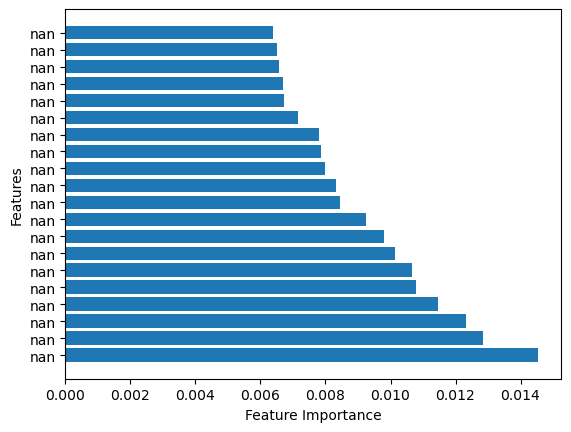

In [79]:
pathway=pd.read_csv('data/ppipathway1.3.csv',index_col=0)
ada = ADASYN()
x = pathway[pathway.columns.difference(['phenotype'])]
y = pathway['phenotype']
X_resampled, y_resampled = ada.fit_resample(x, y)
scaler = StandardScaler()
x_overscaled_kegg = scaler.fit_transform(X_resampled)
x_overtrain, x_overtest, y_overtrain, y_overtest = train_test_split(x_overscaled_kegg, y_resampled, 
                                                    test_size = 0.2, random_state = 123)
dt_importance=pd.DataFrame()
model_final(algorithm, algorithm_name, '',
            x_overtrain, y_overtrain, x_overtest, y_overtest,
            n_estimator, n_depth, n_split, n_leaf)

In [43]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

# class target 정보 제외
train_df = x

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])


/Users/cjh/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/cjh/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


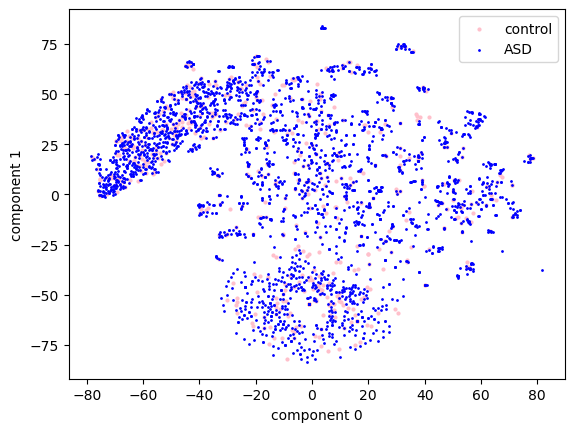

In [49]:
# numpy array -> DataFrame 변환


# class target 정보 불러오기 
tsne_df['phenotype'] = pathway['phenotype']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['phenotype'] == 0]
tsne_df_1 = tsne_df[tsne_df['phenotype'] == 1]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'control',s=4)
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'blue', label = 'ASD',s=1)

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [28]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

# class target 정보 제외
train_df = x

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

/Users/cjh/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/cjh/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [29]:
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

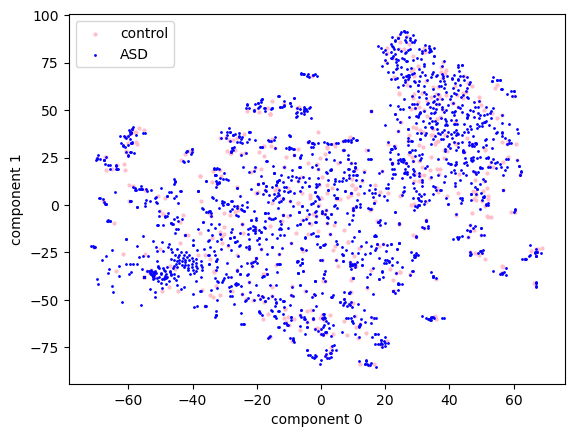

In [30]:
# numpy array -> DataFrame 변환


# class target 정보 불러오기 
tsne_df['phenotype'] = pathway['phenotype']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['phenotype'] == 0]
tsne_df_1 = tsne_df[tsne_df['phenotype'] == 1]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'control',s=4)
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'blue', label = 'ASD',s=1)

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [56]:
xgboost = xgb.XGBClassifier(booster='gbtree')
xgboost.fit(x_overtrain_re, y_overtrain_re)
prediction = xgboost.predict(x_overtest_re)
print((prediction == y_overtest_re).mean())


0.8181818181818182


In [58]:
Random = RFC(random_state=613)
Random.fit(x_overtrain_re, y_overtrain_re)
prediction2 = Random.predict(x_overtest_re)
print((prediction2 == y_overtest_re).mean())

0.8178280863105766


In [195]:
print((prediction3 == y_overtest_re).mean())

/var/folders/cn/cfs3s7gn76b7lv5q1ghlym9r0000gn/T/ipykernel_19534/1412830368.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print((prediction3 == y_overtest_re).mean())


ValueError: ('Lengths must match to compare', (2763,), (2827,))

In [62]:
prediction3=np.logical_or(prediction,prediction2)

In [64]:
prediction4=np.logical_and(prediction,prediction2)
print((prediction4 == y_overtest_re).mean())

0.8118146444994694


In [19]:
n_leaf=1
n_split=4
n_depth=None
n_estimator=130

In [22]:
model = algorithm(random_state = 1234, 
                      n_estimators = n_estimator, 
                      min_samples_leaf = n_leaf,
                      min_samples_split = n_split, 
                      max_depth = n_depth)
model2 = algorithm(random_state = 1234, 
                      n_estimators = n_estimator, 
                      min_samples_leaf = n_leaf,
                      min_samples_split = n_split, 
                      max_depth = n_depth)

# 모델 학습
model.fit(x_overtrain_re, y_overtrain_re)



RandomForestClassifier(min_samples_split=4, n_estimators=130, random_state=1234)

In [ ]:
model = algorithm(random_state = 1234, 
                      n_estimators = n_estimator, 
                      min_samples_leaf = n_leaf,
                      min_samples_split = n_split, 
                      max_depth = n_depth)
model2 = algorithm(random_state = 1234, 
                      n_estimators = n_estimator, 
                      min_samples_leaf = n_leaf,
                      min_samples_split = n_split, 
                      max_depth = n_depth)


In [27]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict(x_overtest_re)

score=roc_auc_score(y_overtest_re,y_pred)
print(score)

0.8211762467073306


In [194]:
y_pred = model2.predict(x_test_kegg)
y_pred_re = model.predict(x_test_re)
y_pred3=np.logical_or(y_pred,y_pred_re)
y_pred4=np.logical_and(y_pred,y_pred_re)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, y_pred):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
print(f"Accuracy: {accuracy_score(y_test, y_pred_re):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, y_pred_re):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, y_pred_re):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, y_pred_re):.3f}") # F1 스코어
print(f"Accuracy: {accuracy_score(y_test, y_pred3):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, y_pred3):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, y_pred3):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, y_pred3):.3f}") # F1 스코어
print(f"Accuracy: {accuracy_score(y_test, y_pred4):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, y_pred4):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, y_pred4):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, y_pred4):.3f}") # F1 스코어

Accuracy: 0.752
Precision: 0.828
Recall: 0.640
F1-score: 0.722
Accuracy: 0.820
Precision: 0.870
Recall: 0.754
F1-score: 0.808
Accuracy: 0.815
Precision: 0.813
Recall: 0.822
F1-score: 0.817
Accuracy: 0.756
Precision: 0.910
Recall: 0.571
F1-score: 0.702


In [108]:
# 최종 모델의 성능 평가
y_test=y_overtest_mixed
y_pred = model.predict(x_overtest)
y_pred_re = model2.predict(x_overtest_re)
y_pred3=model3.predict(x_overtest_mixed)
print(f"Accuracy: {accuracy_score(y_overtest, y_pred):.3f}") # 정확도
print(f"Precision: {precision_score(y_overtest, y_pred):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
print(f"Accuracy: {accuracy_score(y_test, y_pred_re):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, y_pred_Re):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, y_pred_re):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, y_pred_re):.3f}") # F1 스코어
print(f"Accuracy: {accuracy_score(y_test, y_pred3):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, y_pred3):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, y_pred3):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, y_pred3):.3f}") # F1 스코어

NameError: name 'y_overtest_mixed' is not defined

In [211]:
y_pre = model2.predict(x_test_kegg)
y_pred = model2.predict_proba(x_test_kegg)
y_pred2= model.predict_proba(x_test_re)

In [212]:
y_pre

array([0., 0., 0., ..., 0., 0., 0.])

In [214]:
final_predict=[]
for idx in range(2763):
    if y_pred3[idx][0]>=y_pred3[idx][1]:
        final_predict.append(0)
    else:
        final_predict.append(1)
    

In [217]:
print(f"Accuracy: {accuracy_score(y_test, final_predict):.3f}") # 정확도
print(f"Precision: {precision_score(y_test, final_predict):.3f}") # 정밀도
print(f"Recall: {recall_score(y_test, final_predict):.3f}") # 재현율
print(f"F1-score: {f1_score(y_test, final_predict):.3f}") # F1 스코어

Accuracy: 0.819
Precision: 0.857
Recall: 0.767
F1-score: 0.809


In [ ]:
275  hsa05022       0.017
310  hsa05200       0.015


/var/folders/cn/cfs3s7gn76b7lv5q1ghlym9r0000gn/T/ipykernel_63148/1579714988.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


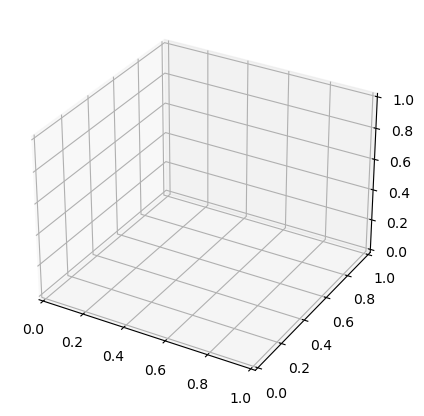

In [63]:
fig = plt.figure(figsize=(5, 5))


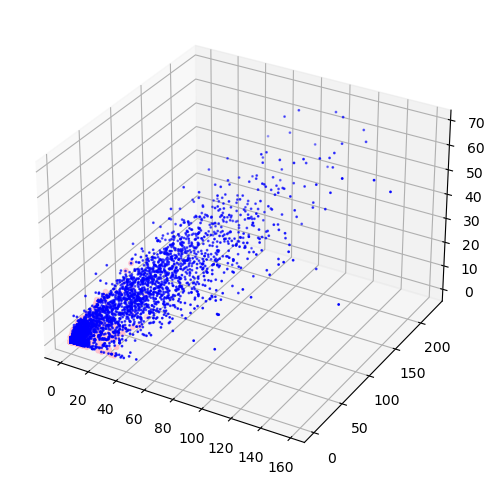

In [79]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
tsne_df_0 = pathway[pathway['phenotype'] == 0]
tsne_df_1 = pathway[pathway['phenotype'] == 1]
ax.scatter(tsne_df_0['hsa05022'], tsne_df_0['hsa05200'],tsne_df_0['hsa05418'], color = 'pink', label = 'control',s=10)
ax.scatter(tsne_df_1['hsa05022'], tsne_df_1['hsa05200'],tsne_df_1['hsa05418'], color = 'blue', label = 'ASD',s=1)

